Practice using and understanding ANNs via churn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from imblearn.over_sampling import SMOTE
from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(9001)
#WHAT!? 9000!?!?

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Churn/Churn_Modelling - Churn_Modelling.csv')
nan_col=[]
for header in df.head():
    nan_col=[]
for header in df.head():
    miss=df[header].isnull().values.any()
    if miss==True:
            nan_col.append(header)
    print(df[header].describe())
print(nan_col)
#No nans

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: RowNumber, dtype: float64
count    1.000000e+04
mean     1.569094e+07
std      7.193619e+04
min      1.556570e+07
25%      1.562853e+07
50%      1.569074e+07
75%      1.575323e+07
max      1.581569e+07
Name: CustomerId, dtype: float64
count     10000
unique     2932
top       Smith
freq         32
Name: Surname, dtype: object
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object
count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%      

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 10 Patch objects>)

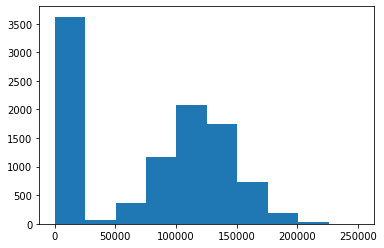

In [ ]:
plt.hist(df['Balance'])
#print(sorted(df['Balance']))

In [ ]:
bal=df['Balance'].to_numpy()
mini = np.min(bal[np.nonzero(bal)])
maxi = np.max(bal[np.nonzero(bal)])
norm_bal=[]
for row in df['Balance']:
    if row!=0:
        norm=(row-mini)/(maxi-mini)
        norm_bal.append(norm)
    else:norm_bal.append(0)
df['Balance']=norm_bal

(array([3.627e+03, 8.200e+01, 4.180e+02, 1.255e+03, 2.089e+03, 1.647e+03,
        6.790e+02, 1.730e+02, 2.800e+01, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

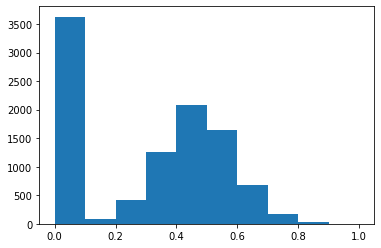

In [ ]:
plt.hist(df['Balance'])

In [ ]:
#11.58
#print(sorted(df['EstimatedSalary']))
tooLow=df.loc[df['EstimatedSalary']==11.58]
ind=tooLow['RowNumber']
df=df.drop(index=ind) 

In [ ]:
df['EstimatedSalary'].describe()

count      9999.000000
mean     100092.497169
std       57512.925829
min          11.580000
25%       50992.930000
50%      100200.400000
75%      149392.065000
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [ ]:
#df['EstimatedSalary']=np.log(df['EstimatedSalary'])
maxi=np.amax(df['EstimatedSalary'].to_numpy())
mini=np.amin(df['EstimatedSalary'].to_numpy())
norm_sal=[]
for row in df['EstimatedSalary']:
    norm=(row-mini)/(maxi-mini)
    norm_sal.append(norm)
df['EstimatedSalary']=norm_sal

(array([ 987.,  968., 1006., 1026., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

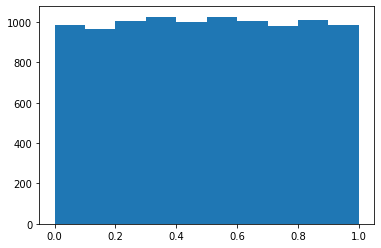

In [ ]:
plt.hist(df['EstimatedSalary'])

(array([  19.,  166.,  447.,  958., 1443., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

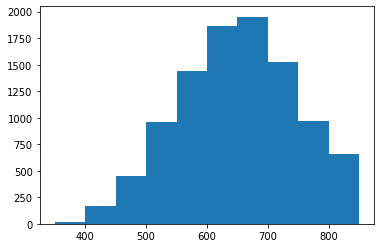

In [ ]:
plt.hist(df['CreditScore'])

In [ ]:
#print(sorted(df['CreditScore']))
#of 10000 obs only 19 are below 400
low=df.loc[df['CreditScore']<400]
ind=low['RowNumber']
for num in ind:
    df=df.drop(index=num)
df.shape

(9980, 14)

In [ ]:
#normalize credit score via the max (/850)
norm_score=[]
cred=df['CreditScore']
for num in cred:
    norm_score.append(num/850)
df['CreditScore']=norm_score
df["CreditScore"].describe

<bound method NDFrame.describe of 0       0.728235
1       0.715294
2       0.590588
3       0.822353
4       1.000000
          ...   
9995    0.907059
9996    0.607059
9997    0.834118
9998    0.908235
9999    0.931765
Name: CreditScore, Length: 9980, dtype: float64>

(array([  19.,  165.,  446.,  955., 1440., 1865., 1948., 1521.,  966.,
         655.]),
 array([0.41176471, 0.47058824, 0.52941176, 0.58823529, 0.64705882,
        0.70588235, 0.76470588, 0.82352941, 0.88235294, 0.94117647,
        1.        ]),
 <a list of 10 Patch objects>)

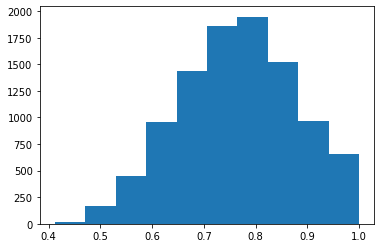

In [ ]:
plt.hist(df['CreditScore'])

(array([ 608., 2176., 3621., 1867.,  827.,  522.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

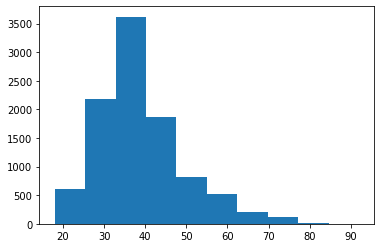

In [ ]:
plt.hist(df['Age'])

In [ ]:
#print(sorted(df['Age']))
#Out 9999 obs only 15 are above 79
old=df.loc[df['Age']>79]
ind=old['RowNumber']
for num in ind:
    df=df.drop(index=num)
df.shape

(9965, 14)

In [ ]:
#Normalize Age
'''maxi=np.amax(df['Age'].to_numpy())
mini=np.amin(df['Age'].to_numpy())
norm_age=[]
for row in df['Age']:
    norm=(row-mini)/(maxi-mini)
    norm_age.append(norm)
df['Age']=norm_age'''
df['Age']=np.log(df['Age'])

(array([ 142.,  312., 1181., 2031., 2729., 1865.,  978.,  498.,  210.,
          19.]),
 array([2.89037176, 3.05351344, 3.21665512, 3.3797968 , 3.54293849,
        3.70608017, 3.86922185, 4.03236353, 4.19550521, 4.3586469 ,
        4.52178858]),
 <a list of 10 Patch objects>)

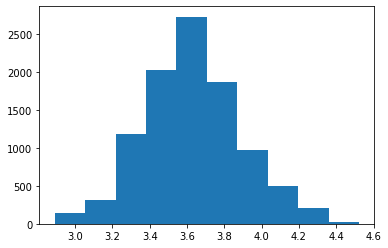

In [ ]:
plt.hist(df['Age'])

In [ ]:
print(df['Geography'].value_counts())

France     4998
Germany    2498
Spain      2469
Name: Geography, dtype: int64


In [ ]:
geo=df['Geography']
france=[]
germany=[]
spain=[]
for row in geo:
    if 'France' in row:
        france.append(1)
        germany.append(0)
        spain.append(0)
    elif 'Germany' in row:
        france.append(0)
        germany.append(1)
        spain.append(0)
    elif 'Spain' in row:
        france.append(0)
        germany.append(0)
        spain.append(1)
df['France']=france
df['Germany']=germany
df['Spain']=spain
df=df.drop(columns='Geography')

In [ ]:
df.shape

(9965, 16)

In [ ]:
gen=df['Gender']
male=[]
female=[]
for row in gen:
    if 'Male' in row:
        male.append(1)
        female.append(0)
    elif 'Female' in row:
        male.append(0)
        female.append(1)
df['Male']=male
df['Female']=female
df=df.drop(columns='Gender')

In [ ]:
df.shape

(9965, 17)

(array([7936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2029.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

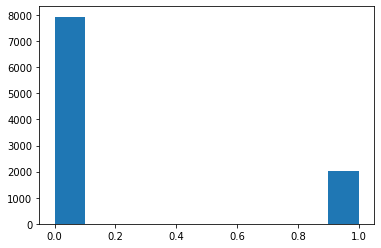

In [ ]:
plt.hist(df['Exited'])

In [ ]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

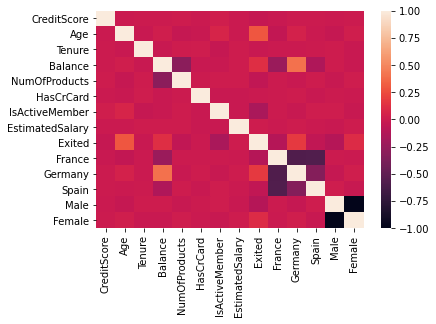

<Figure size 720x504 with 0 Axes>

In [ ]:
corr=df.corr()
sn.heatmap(corr)
plt.figure(figsize=(10,7))
plt.show()

In [ ]:
shuffle_ind=np.random.permutation(len(df))
training_ind=int(len(df)*.8)
training=shuffle_ind[:training_ind]
val_ind=int(len(df)*.9)
val=shuffle_ind[training_ind:val_ind]
test=shuffle_ind[val_ind:]
columns=df.columns
X_labels=[]

for column in columns:
    if column!='Exited':
        X_labels.append(column)
#X_labels=header[3:-2]
features=df[X_labels]
target=df['Exited']
train_X=features.iloc[training]
train_y=target.iloc[training]
val_X=features.iloc[val]
val_y=target.iloc[val]
test_X=features.iloc[test]
test_y=target.iloc[test]
#to numpy
train_X=train_X.to_numpy()
train_y=train_y.to_numpy()
val_X=val_X.to_numpy()
val_y=val_y.to_numpy()
test_X=test_X.to_numpy()
test_y=test_y.to_numpy()

In [ ]:
np.bincount(train_y)

array([6330, 1642])

In [ ]:
smt = SMOTE()
train_X, train_y = smt.fit_sample(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.bincount(train_y)

array([6330, 6330])

In [ ]:
def linear(H):
    return H
  
def ReLU(H):
    return H*(H>0)

def sigmoid(H):
    return 1/(1+ np.exp(np.float128(-H)))

def softmax(H):
    eH=np.exp(H)
    return eH/eH.sum(axis=1, keepdims =True)

def cross_entropy(Y,P_hat):
    return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y,Y_hat):
    return (1/(2*len(Y)))*np.sum((Y - Y_hat)**2)

def one_hot_encode(y):
    N=len(y)
    K = len(set(y))
    Y=np.zeros((N,K))

    for i in range(N):
        Y[i, y[i]]=1

    return Y

def accuracy(y, y_hat):
    return np.mean(y==y_hat)

def R2(y,y_hat):
    return 1- np.sum((y - y_hat)**2)/np.sum((y - y.mean())**2)

def derivative(Z,a):
    if a==linear:
        return 1
    elif a==sigmoid:
        return Z*(1-Z)
    elif a==np.tanh:
        return 1-Z*Z
    elif a==ReLU:
        return(Z>0).astype(int)
    else:
        ValueError('Uknown Activation Function')

In [ ]:
class ANN():
    def __init__(self,architecture,activations=None,mode=1):
        self.mode=mode
        self.architecture=architecture
        self.activations=activations
        self.L=len(architecture)+1
        
    def fit(self,X,y,eta=1e-3,epochs=1e3,show_curve=False):
        epochs=int(epochs)
        if self.mode:
            Y=one_hot_encode(y)
        else:
            Y=one_hot_encode(y)
            
        N,D=X.shape
        K=Y.shape[1]
        
        #Initialize Weights and Biases:Stochastic Initialization
        self.W={l:np.random.randn(M[0],M[1]) for l,M in enumerate
                (zip(([D]+self.architecture),(self.architecture+[K])),1)}
        self.b={l:np.random.randn(M) for l,M in enumerate(self.architecture+[K],1)}
        
        #Activation Function Loading
        if self.activations is None:
            self.a={l: ReLU for l in range(1,self.L)}
        else:
            self.a={l: act for l,act in enumerate(self.activations,1)}
            
        #Mode Set
        if self.mode:
            self.a[self.L]=linear
        else:
            self.a[self.L]=softmax
        J=np.zeros(epochs)
        
        #Gradient Descent/Back Propagation
        for epoch in range(epochs):
            self.forward(X)
            
            if self.mode:
                J[epoch]=OLS(Y,self.Z[self.L])
            else:
                J[epoch]=cross_entropy(Y,self.Z[self.L])
            dH=(1/N)*(self.Z[self.L]-Y)
            
            for l in sorted(self.W.keys(),reverse=True):
                dW=self.Z[l-1].T@dH
                db=dH.sum(axis=0)
                
                self.W[l]-=eta*dW
                self.b[l]-=eta*db
                
                if l>1:
                    dZ=dH@self.W[l].T
                    dH=dZ*derivative(self.Z[l-1],self.a[l-1])
                    
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve')
            plt.show()
            
    def forward(self,X):
        self.Z={0:X}
        for l in sorted(self.W.keys()):
            self.Z[l]=self.a[l](self.Z[l-1]@self.W[l]+self.b[l])
    
    def predict(self,X):
        self.forward(X)
        
        if self.mode:
            return self.Z[self.L]
        else:
            return self.Z[self.L].argmax(axis=1)

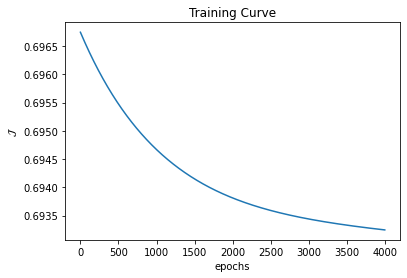

In [ ]:
ann = ANN(mode=0,architecture=[32, 12, 2],activations=[ReLU,ReLU,sigmoid])
ann.fit(train_X, train_y, eta = 1e-3, epochs = 4e3, show_curve = True)

In [ ]:
 y_hat = ann.predict(test_X)
 y_hat = pd.DataFrame(y_hat)
 print(y_hat)
 def filter_func(x):
   if x > 0.2:
     return 1
   else:
     return 0
y_hat = y_hat.iloc[:, 0].apply(filter_func)
print(f"Training Accuracy: {accuracy(test_y, y_hat):0.4f}")

     0
0    0
1    0
2    0
3    0
4    0
..  ..
992  0
993  0
994  0
995  0
996  0

[997 rows x 1 columns]
Training Accuracy: 0.7372


In [ ]:
"Author: Ezra Cook"
def confusion_matrix(y, y_hat):
  plt.figure(figsize=(10,7))
  y_actu = pd.Series(y, name='Actual')
  y_pred = pd.Series(y_hat, name='Predicted')
  cm = pd.crosstab(y_actu, y_pred)
  ax = sn.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  #plt.savefig("/content/drive/MyDrive/cm")

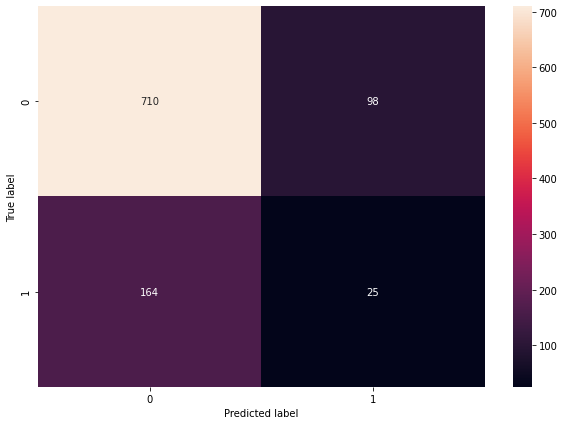

In [ ]:
confusion_matrix(test_y, y_hat)

In [ ]:
print(y_hat)

0      0
1      0
2      0
3      0
4      0
      ..
992    0
993    0
994    0
995    0
996    0
Name: 0, Length: 997, dtype: int64
